In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = 'Scene3BasicRansac1.xlsx'
file_path2 = 'Scene3BasicRansac2.xlsx'
file_path3 = 'Scene3NormalRansac1.xlsx'
file_path4 = 'Scene3NormalRansac2.xlsx'


# Read the Excel file
BasicRansac1 = pd.read_excel(file_path)
BasicRansac2 = pd.read_excel(file_path2)
NormalRansac1 = pd.read_excel(file_path3)
NormalRansac2 = pd.read_excel(file_path4)

NormalRansac2

,Model,Num Inliers,Mean Distance,Std Deviation Distance,Plane Normal,Plane Distance,Point on Plane,Orthogonal Vector 1,Orthogonal Vector 2,Num Inliers Positive,...,Cylinder Radius,Cylinder Height,Num Inliers within Radius,Mean Distance within Radius,Std Deviation within Radius,Num Inliers outside Radius,Mean Distance outside Radius,Std Deviation outside Radius,Centroid within Radius,Centroid outside Radius
0,plane,1237,0.000974,0.000878,[ 0.04214464 0.71805622 -0.69470792],-0.136884,[-3.44917207e-04 6.18923703e-01 4.42490440e-01],[ 0.99828202 -0.05859185 0. ],[-0.04070422 -0.69351442 -0.71929195],816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plane,1050,0.001704,0.001118,[ 0.0106669 -0.68865511 -0.72501059],0.788877,[0.00108076 0.59612256 0.52204699],[-0.99988006 -0.01548761 0. ],[-0.01122868 0.72492363 -0.68873772],531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,plane,829,0.001947,0.001146,[ 0.00674829 -0.75837458 -0.65178406],0.752663,[0.00734516 0.56350017 0.49883745],[-0.99996041 -0.00889801 0. ],[-0.00579958 0.65175825 -0.7584046 ],424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,plane,542,0.001879,0.001117,[ 0.10616665 0.9393839 -0.32601614],-0.374447,[0.00186233 0.57584942 0.5118159 ],[ 0.99367408 -0.11230238 0. ],[-0.03661239 -0.32395379 -0.9453642 ],265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cylinder,427,0.022314,0.002195,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022321,0.180576,210.0,0.020395,0.001136,217.0,0.024171,0.001106,[-0.09839616 0.5779377 0.54423348],[-0.09900081 0.57685342 0.54354097]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,plane,807,0.001779,0.001115,[-0.02483891 -0.67878135 -0.73392023],0.746566,[0.0019867 0.57296162 0.48730712],[-0.99933113 0.03656891 0. ],[ 0.02683866 0.73342934 -0.67923567],416.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,plane,489,0.001899,0.001209,[-0.01238129 -0.77955824 -0.62620735],0.801143,[-0.02955977 0.58254996 0.55490774],[-0.9998739 0.01588044 0. ],[ 0.00994445 0.62612839 -0.77965656],252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,cylinder,369,0.027019,0.002257,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026985,0.102371,182.0,0.025062,0.001193,187.0,0.028923,0.001148,[-0.01351529 0.56190092 0.43543734],[-0.0103722 0.55818209 0.43376636]
68,cylinder,362,0.027139,0.002276,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026889,0.179031,159.0,0.024902,0.001109,203.0,0.028890,0.001135,[0.09287252 0.57435623 0.52021331],[0.09161192 0.56372932 0.52978428]


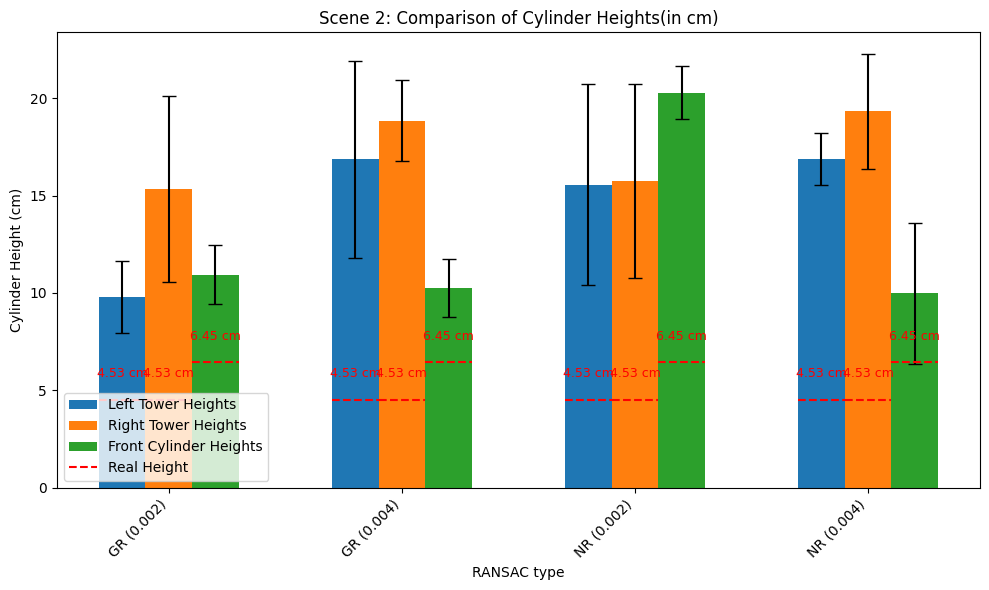

In [27]:
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]

cylinder_heights = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}
cylinder_std_devs = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}


# Define the real heights of each cylinder in centimeters
real_heights = {
    'Left Tower': 4.53,  # replace with the actual real height in cm
    'Right Tower': 4.53,    # replace with the actual real height in cm
    'Front Cylinder': 6.45
}

# Process each file to gather cylinder heights and calculate standard deviation
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Extract heights for each specific cylinder type, converting from meters to centimeters
    for cylinder_name in cylinder_heights.keys():
        cylinder_data = data[data['Name'] == cylinder_name]
        if not cylinder_data.empty:
            heights_cm = cylinder_data['Cylinder Height'].dropna() * 100  # Convert from meters to cm
            cylinder_heights[cylinder_name].append(heights_cm.mean())
            cylinder_std_devs[cylinder_name].append(heights_cm.std())
        else:
            cylinder_heights[cylinder_name].append(None)  # Handle cases where data might be missing
            cylinder_std_devs[cylinder_name].append(None)

# Create a bar plot to compare the heights of each cylinder with standard deviation as error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cylinder's heights as grouped bars with error bars for standard deviation
bar_width = 0.2
x = range(len(custom_legend_names))

for i, (cylinder_name, heights) in enumerate(cylinder_heights.items()):
    std_devs = cylinder_std_devs[cylinder_name]
    bars = ax.bar([pos + i * bar_width for pos in x], heights, yerr=std_devs, capsize=5,
                  width=bar_width, label=f'{cylinder_name} Heights')
    
    # Add dashed lines for the real height within each bar and add text label for the height
    for bar in bars:
        ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [real_heights[cylinder_name]] * 2, 
                color='red', linestyle='--', linewidth=1.5)
        
        # Place a text label showing the real height value above the dashed line
        ax.text(bar.get_x() + bar.get_width() / 2, real_heights[cylinder_name] + 1,  # Adjust position as needed
                f'{real_heights[cylinder_name]} cm', ha='center', va='bottom', color='red', fontsize=9)

# Add a custom legend entry for the real height dashed line
real_height_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1.5, label='Real Height')
handles, labels = ax.get_legend_handles_labels()
handles.append(real_height_line)
labels.append('Real Height')

# Customize plot appearance
ax.set_xlabel('RANSAC type')
ax.set_ylabel('Cylinder Height (cm)')
ax.set_title('Scene 2: Comparison of Cylinder Heights(in cm)')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
ax.legend(handles=handles, labels=labels, loc='lower left')
plt.tight_layout()
plt.show()

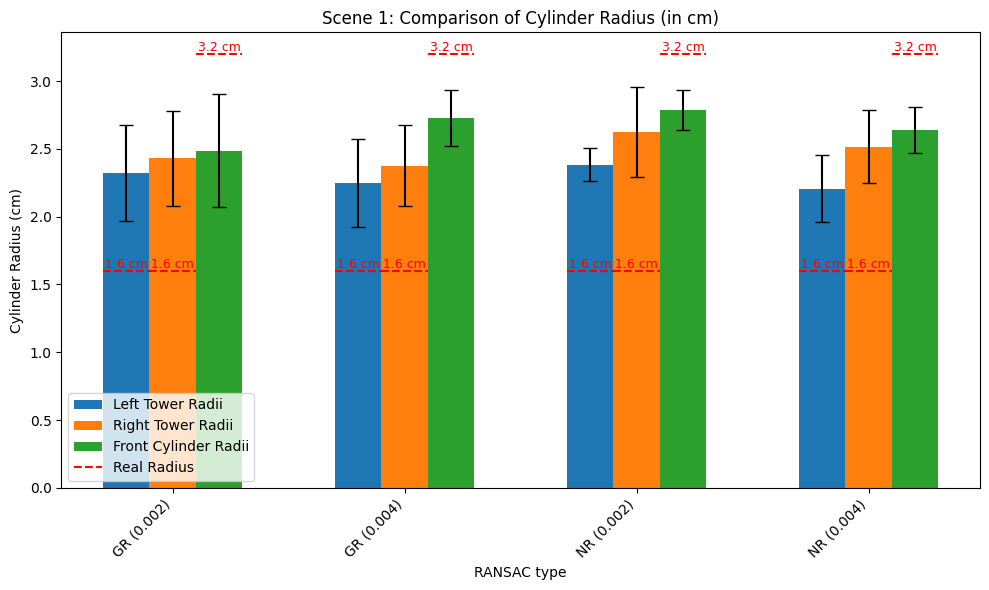

In [29]:

# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]

cylinder_radii = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}
cylinder_std_devs = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}


# Define the real heights of each cylinder in centimeters
real_radii = {
    'Left Tower': 1.6,  # replace with the actual real height in cm
    'Right Tower': 1.6,    # replace with the actual real height in cm
    'Front Cylinder': 3.2
}

# Process each file to gather cylinder radii and calculate standard deviation
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Extract radii for each specific cylinder type, converting from meters to centimeters
    for cylinder_name in cylinder_radii.keys():
        cylinder_data = data[data['Name'] == cylinder_name]
        if not cylinder_data.empty:
            radii_cm = cylinder_data['Cylinder Radius'].dropna() * 100  # Convert from meters to cm
            cylinder_radii[cylinder_name].append(radii_cm.mean())
            cylinder_std_devs[cylinder_name].append(radii_cm.std())
        else:
            cylinder_radii[cylinder_name].append(None)  # Handle cases where data might be missing
            cylinder_std_devs[cylinder_name].append(None)

# Create a bar plot to compare the radii of each cylinder with standard deviation as error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cylinder's radii as grouped bars with error bars for standard deviation
bar_width = 0.2
x = range(len(custom_legend_names))

for i, (cylinder_name, radii) in enumerate(cylinder_radii.items()):
    std_devs = cylinder_std_devs[cylinder_name]
    bars = ax.bar([pos + i * bar_width for pos in x], radii, yerr=std_devs, capsize=5,
                  width=bar_width, label=f'{cylinder_name} Radii')
    
    # Add dashed lines for the real radius within each bar and add text label for the radius
    for bar in bars:
        ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [real_radii[cylinder_name]] * 2, 
                color='red', linestyle='--', linewidth=1.5)
        
        # Place a text label showing the real radius value directly on the dashed line
        ax.text(bar.get_x() + bar.get_width() / 2, real_radii[cylinder_name],  # Position on the line
                f'{real_radii[cylinder_name]} cm', ha='center', va='bottom', color='red', fontsize=9)

# Add a custom legend entry for the real radius dashed line
real_radius_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1.5, label='Real Radius')
handles, labels = ax.get_legend_handles_labels()
handles.append(real_radius_line)
labels.append('Real Radius')

# Customize plot appearance
ax.set_xlabel('RANSAC type')
ax.set_ylabel('Cylinder Radius (cm)')
ax.set_title('Scene 2: Comparison of Cylinder Radius (in cm)')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
ax.legend(handles=handles, labels=labels, loc='lower left')
plt.tight_layout()
plt.show()

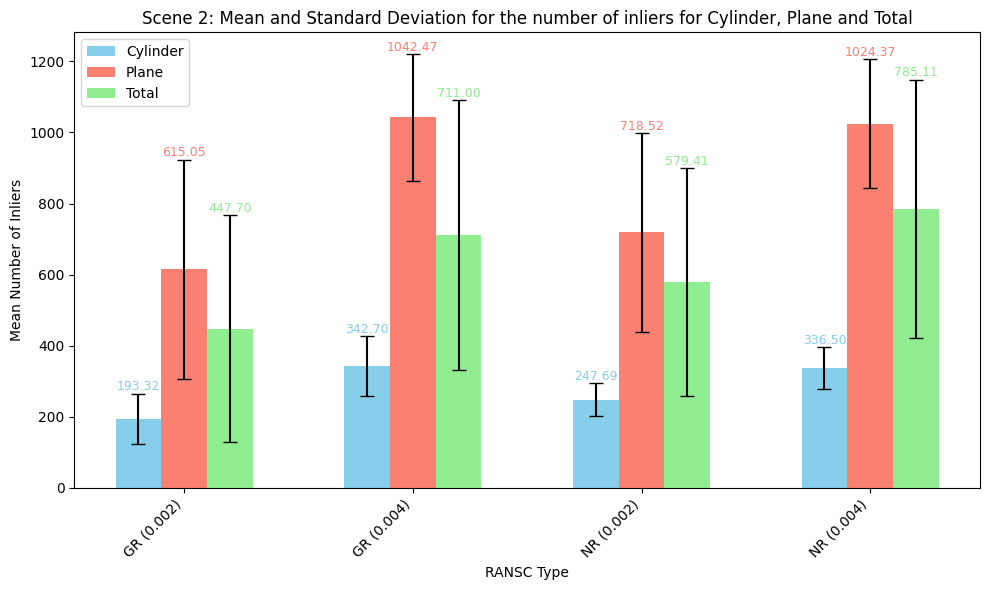

In [33]:
# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]

# Lists to store mean and standard deviation for cylinders, planes, and overall
mean_inliers_cylinder = []
std_dev_inliers_cylinder = []
mean_inliers_plane = []
std_dev_inliers_plane = []
mean_inliers_total = []
std_dev_inliers_total = []

# Process each file to calculate means and standard deviations for cylinders, planes, and overall
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter out failed runs (rows where "Name" contains "Fail")
    successful_runs = data[~data['Name'].str.contains('fail', case=False, na=False)]
    
    # Calculate mean and std for Cylinder
    cylinder_data = successful_runs[successful_runs['Model'] == 'cylinder']
    mean_inliers_cylinder.append(cylinder_data['Num Inliers'].mean())
    std_dev_inliers_cylinder.append(cylinder_data['Num Inliers'].std())
    
    # Calculate mean and std for Plane
    plane_data = successful_runs[successful_runs['Model'] == 'plane']
    mean_inliers_plane.append(plane_data['Num Inliers'].mean())
    std_dev_inliers_plane.append(plane_data['Num Inliers'].std())
    
    # Calculate mean and std for Total (all successful runs)
    mean_inliers_total.append(successful_runs['Num Inliers'].mean())
    std_dev_inliers_total.append(successful_runs['Num Inliers'].std())

# Create a bar plot with error bars for each category
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x = range(len(file_paths))

# Plot data for Cylinders
ax.bar([pos - bar_width for pos in x], mean_inliers_cylinder, yerr=std_dev_inliers_cylinder,
       capsize=5, width=bar_width, label='Cylinder', color='skyblue')

# Plot data for Planes
ax.bar(x, mean_inliers_plane, yerr=std_dev_inliers_plane, capsize=5, width=bar_width, label='Plane', color='salmon')

# Plot data for Total
ax.bar([pos + bar_width for pos in x], mean_inliers_total, yerr=std_dev_inliers_total,
       capsize=5, width=bar_width, label='Total', color='lightgreen')

# Customize plot appearance
ax.set_xlabel('RANSC Type')
ax.set_ylabel('Mean Number of Inliers')
ax.set_title('Scene 2: Mean and Standard Deviation for the number of inliers for Cylinder, Plane and Total')
ax.set_xticks(x)
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
ax.legend()

# Display the mean values on top of each bar
for i in range(len(file_paths)):
    # Cylinder
    ax.text(i - bar_width, mean_inliers_cylinder[i] + std_dev_inliers_cylinder[i] + 1, 
            f'{mean_inliers_cylinder[i]:.2f}', ha='center', va='bottom', fontsize=9, color='skyblue')
    # Plane
    ax.text(i, mean_inliers_plane[i] + std_dev_inliers_plane[i] + 1, 
            f'{mean_inliers_plane[i]:.2f}', ha='center', va='bottom', fontsize=9, color='salmon')
    # Total
    ax.text(i + bar_width, mean_inliers_total[i] + std_dev_inliers_total[i] + 1, 
            f'{mean_inliers_total[i]:.2f}', ha='center', va='bottom', fontsize=9, color='lightgreen')

plt.tight_layout()
plt.show()

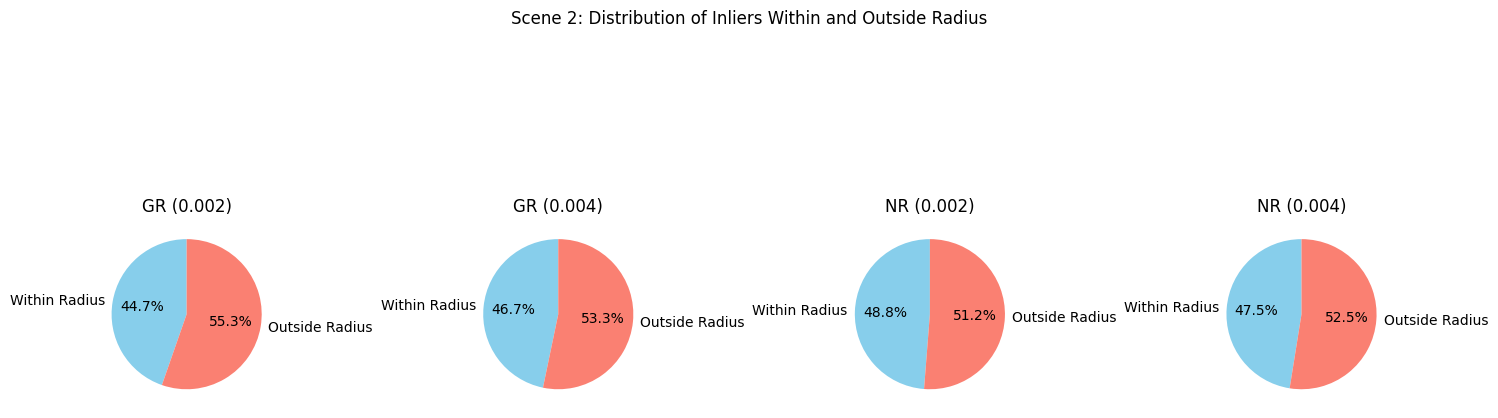

In [3]:
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]

custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]

# Prepare data for each pie chart
inliers_within_radius = []
inliers_outside_radius = []

for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter out failed runs (rows where "Name" contains "Fail")
    successful_data = data[~data['Name'].str.contains('fail', case=False, na=False)]
    
    # Sum the inliers within and outside the radius
    within_radius = successful_data['Num Inliers within Radius'].sum()
    outside_radius = successful_data['Num Inliers outside Radius'].sum()
    
    inliers_within_radius.append(within_radius)
    inliers_outside_radius.append(outside_radius)

# Plot multiple pie charts in a single figure
fig, axes = plt.subplots(1, len(file_paths), figsize=(15, 6))

for i, ax in enumerate(axes):
    # Pie chart data
    sizes = [inliers_within_radius[i], inliers_outside_radius[i]]
    labels = ['Within Radius', 'Outside Radius']
    
    # Only plot if there are any inliers
    if sum(sizes) > 0:
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
    
    ax.set_title(custom_legend_names[i])

plt.suptitle('Scene 2: Distribution of Inliers Within and Outside Radius')
plt.tight_layout()
plt.show()

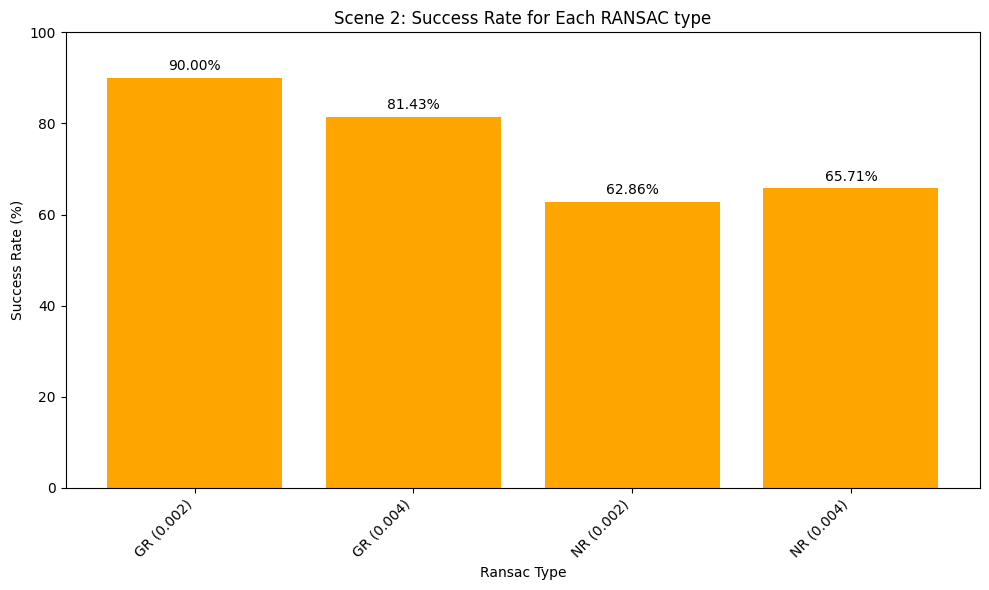

In [31]:
# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]

# List to store success rates for each file
success_rates = []

# Process each file to calculate success rate
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Calculate total attempts and failed attempts
    total_attempts = len(data)
    failed_attempts = data['Name'].str.contains('fail', case=False, na=False).sum()
    
    # Calculate success rate
    success_rate = ((total_attempts - failed_attempts) / total_attempts) * 100
    success_rates.append(success_rate)

# Create a bar plot to show success rates
plt.figure(figsize=(10, 6))
plt.bar(custom_legend_names, success_rates, color='orange')
plt.xlabel('Ransac Type')
plt.ylabel('Success Rate (%)')
plt.title('Scene 2: Success Rate for Each RANSAC type')
plt.ylim(0, 100)  # Set the y-axis limit to 100% for clarity
plt.xticks(rotation=45, ha='right')

# Display the success rate values on top of each bar
for i, rate in enumerate(success_rates):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


File: Scene3NormalRansac1.xlsx
Mean angular difference: 128.15 degrees
Standard deviation of angular difference: 70.89 degrees


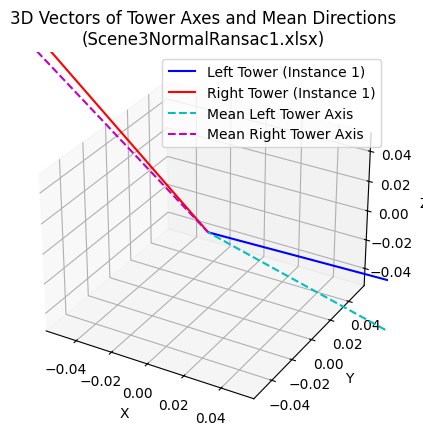

In [16]:
def analyze_tower_axes(file_path):
    # Load the Excel file
    data = pd.read_excel(file_path)

    # Filter rows for "Left Tower" and "Right Tower"
    left_tower_rows = data[data['Name'] == 'Left Tower']
    right_tower_rows = data[data['Name'] == 'Right Tower']

    # Ensure equal number of "Left Tower" and "Right Tower" rows to calculate pairwise angles
    min_rows = min(len(left_tower_rows), len(right_tower_rows))
    left_tower_rows = left_tower_rows.iloc[:min_rows]
    right_tower_rows = right_tower_rows.iloc[:min_rows]

    # Function to parse axis without commas, e.g., "[-0.71081321 0.00406658 0.80140339]"
    def parse_axis_no_commas(axis_str):
        axis_values = [float(value) for value in axis_str.strip("[]").split()]
        return np.array(axis_values)

    # Calculate individual angular differences and accumulate vectors for mean calculation
    angles = []
    left_axes = []
    right_axes = []

    for i in range(min_rows):
        left_axis = parse_axis_no_commas(left_tower_rows.iloc[i]['Cylinder Axis'])
        right_axis = parse_axis_no_commas(right_tower_rows.iloc[i]['Cylinder Axis'])

        # Calculate angle between axes
        dot_product = np.dot(left_axis, right_axis)
        magnitude_left = np.linalg.norm(left_axis)
        magnitude_right = np.linalg.norm(right_axis)
        angle_radians = np.arccos(dot_product / (magnitude_left * magnitude_right))
        angle_degrees = np.degrees(angle_radians)
        angles.append(angle_degrees)

        # Append axes for mean calculation
        left_axes.append(left_axis)
        right_axes.append(right_axis)

    # Calculate mean angle, standard deviation, and mean axis directions
    mean_angle = np.mean(angles)
    std_angle = np.std(angles)
    mean_left_axis = np.mean(left_axes, axis=0)
    mean_right_axis = np.mean(right_axes, axis=0)

    print(f"File: {file_path}")
    print(f"Mean angular difference: {mean_angle:.2f} degrees")
    print(f"Standard deviation of angular difference: {std_angle:.2f} degrees")

    # Normalize mean axes for plotting
    mean_left_axis /= np.linalg.norm(mean_left_axis)
    mean_right_axis /= np.linalg.norm(mean_right_axis)

    # Plot the 3D vectors for the first instance and the mean vectors
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot first instance vectors
    first_left_axis = parse_axis_no_commas(left_tower_rows.iloc[0]['Cylinder Axis'])
    first_right_axis = parse_axis_no_commas(right_tower_rows.iloc[0]['Cylinder Axis'])
    ax.quiver(0, 0, 0, first_left_axis[0], first_left_axis[1], first_left_axis[2], color='b', label="Left Tower (Instance 1)")
    ax.quiver(0, 0, 0, first_right_axis[0], first_right_axis[1], first_right_axis[2], color='r', label="Right Tower (Instance 1)")

    # Plot mean vectors
    ax.quiver(0, 0, 0, mean_left_axis[0], mean_left_axis[1], mean_left_axis[2], color='c', linestyle='dashed', label="Mean Left Tower Axis")
    ax.quiver(0, 0, 0, mean_right_axis[0], mean_right_axis[1], mean_right_axis[2], color='m', linestyle='dashed', label="Mean Right Tower Axis")

    # Set labels and show plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(f"3D Vectors of Tower Axes and Mean Directions\n({file_path})")
    plt.legend()
    plt.show()

# Analyze both files
analyze_tower_axes('Scene3NormalRansac1.xlsx')

## Angular difference

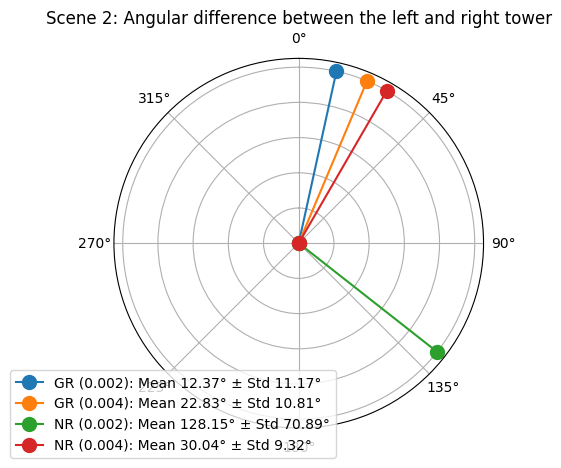

In [30]:
def calculate_mean_and_std_angular_difference(file_path):
    # Load the Excel file
    data = pd.read_excel(file_path)

    # Filter rows for "Left Tower" and "Right Tower"
    left_tower_rows = data[data['Name'] == 'Left Tower']
    right_tower_rows = data[data['Name'] == 'Right Tower']

    # Ensure equal number of "Left Tower" and "Right Tower" rows to calculate pairwise angles
    min_rows = min(len(left_tower_rows), len(right_tower_rows))
    left_tower_rows = left_tower_rows.iloc[:min_rows]
    right_tower_rows = right_tower_rows.iloc[:min_rows]

    # Function to parse axis without commas, e.g., "[-0.71081321 0.00406658 0.80140339]"
    def parse_axis_no_commas(axis_str):
        axis_values = [float(value) for value in axis_str.strip("[]").split()]
        return np.array(axis_values)

    # Calculate individual angular differences and accumulate them
    angles = []
    for i in range(min_rows):
        left_axis = parse_axis_no_commas(left_tower_rows.iloc[i]['Cylinder Axis'])
        right_axis = parse_axis_no_commas(right_tower_rows.iloc[i]['Cylinder Axis'])

        # Calculate angle between axes
        dot_product = np.dot(left_axis, right_axis)
        magnitude_left = np.linalg.norm(left_axis)
        magnitude_right = np.linalg.norm(right_axis)
        angle_radians = np.arccos(dot_product / (magnitude_left * magnitude_right))
        angle_degrees = np.degrees(angle_radians)
        angles.append(angle_degrees)

    # Calculate mean and standard deviation for the file
    mean_angle = np.mean(angles)
    std_dev = np.std(angles)
    return mean_angle, std_dev

# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'GR (0.002)',
    'GR (0.004)',
    'NR (0.002)',
    'NR (0.004)'
]
mean_angular_differences = []
std_devs = []

# Calculate mean angular difference and standard deviation for each file
for file_path in file_paths:
    mean_angle, std_dev = calculate_mean_and_std_angular_difference(file_path)
    mean_angular_differences.append(mean_angle)
    std_devs.append(std_dev)

# Convert mean angular differences to radians for polar plotting
mean_angular_differences_rad = np.radians(mean_angular_differences)

# Plot the mean angular differences in a polar plot without shading for standard deviation
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

# Plot each mean angular difference with a fixed radius of 1
for i, mean_angle_rad in enumerate(mean_angular_differences_rad):
    ax.plot([0, mean_angle_rad], [0, 1], marker='o', markersize=10,
            label=f"{custom_legend_names[i]}: Mean {mean_angular_differences[i]:.2f}° ± Std {std_devs[i]:.2f}°")

# Remove radial labels (small decimal numbers)
ax.set_yticklabels([])

# Customize plot appearance
ax.set_theta_zero_location("N")  # Set zero angle to the top (north)
ax.set_theta_direction(-1)  # Set angles to increase clockwise
plt.title("Scene 2: Angular difference between the left and right tower")
plt.legend(loc='lower left', bbox_to_anchor=(-0.3, -0.1))  # Move legend to bottom left outside plot
plt.show()

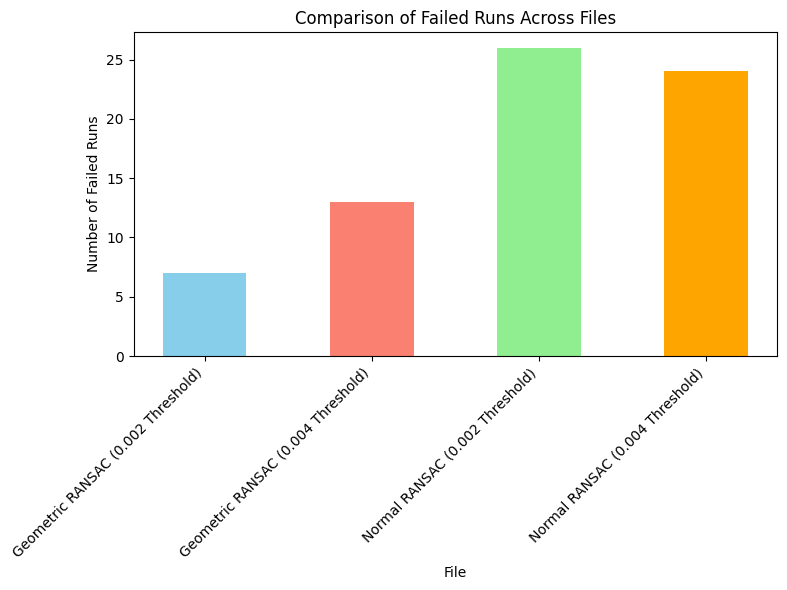

In [34]:
# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'Geometric RANSAC (0.002 Threshold)',
    'Geometric RANSAC (0.004 Threshold)',
    'Normal RANSAC (0.002 Threshold)',
    'Normal RANSAC (0.004 Threshold)'
]
fail_counts = []

# Count the number of failed runs for each file
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Count rows where 'Name' contains 'fail'
    fail_count = data['Name'].str.contains('fail', case=False, na=False).sum()
    fail_counts.append(fail_count)

# Create a bar plot for the fail counts with skinnier bars
plt.figure(figsize=(8, 6))
plt.bar(custom_legend_names, fail_counts, width=0.5, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('File')
plt.ylabel('Number of Failed Runs')
plt.title('Comparison of Failed Runs Across Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

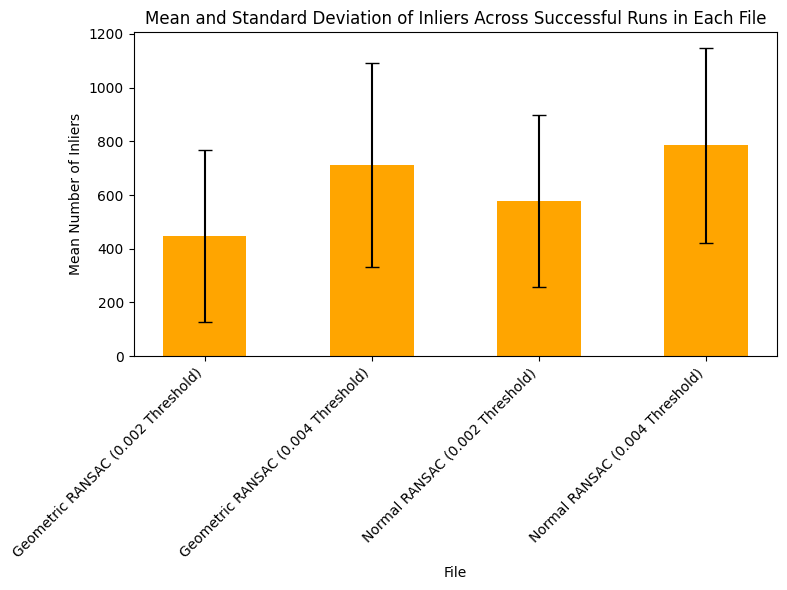

In [41]:
# File paths and custom names for the legend
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'Geometric RANSAC (0.002 Threshold)',
    'Geometric RANSAC (0.004 Threshold)',
    'Normal RANSAC (0.002 Threshold)',
    'Normal RANSAC (0.004 Threshold)'
]

mean_inliers = []
std_dev_inliers = []

# Process each file to calculate mean and standard deviation of inliers for successful runs
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter out failed runs (assuming "Name" column indicates failure with "fail")
    successful_runs = data[~data['Name'].str.contains('fail', case=False, na=False)]
    
    # Assuming there's an 'Inliers' column with inlier counts, calculate mean and std deviation
    inliers = successful_runs['Num Inliers'].dropna()
    mean_inliers.append(inliers.mean())
    std_dev_inliers.append(inliers.std())

# Create a bar plot with error bars to show mean and std deviation of inliers across files
plt.figure(figsize=(8, 6))
plt.bar(custom_legend_names, mean_inliers, yerr=std_dev_inliers, capsize=5, color='orange', width=0.5)
plt.xlabel('File')
plt.ylabel('Mean Number of Inliers')
plt.title('Mean and Standard Deviation of Inliers Across Successful Runs in Each File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

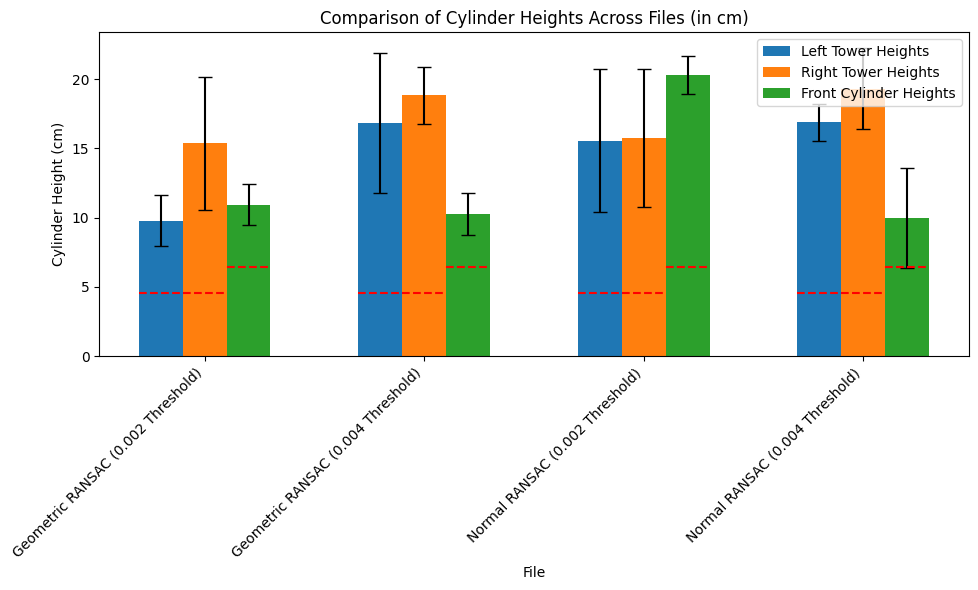

In [48]:
# Extract cylinder heights for each cylinder type in centimeters
cylinder_heights = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}
cylinder_std_devs = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}

# Process each file to gather cylinder heights and calculate standard deviation
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Extract heights for each specific cylinder type, converting from meters to centimeters
    for cylinder_name in cylinder_heights.keys():
        cylinder_data = data[data['Name'] == cylinder_name]
        if not cylinder_data.empty:
            heights_cm = cylinder_data['Cylinder Height'].dropna() * 100  # Convert from meters to cm
            cylinder_heights[cylinder_name].append(heights_cm.mean())
            cylinder_std_devs[cylinder_name].append(heights_cm.std())
        else:
            cylinder_heights[cylinder_name].append(None)  # Handle cases where data might be missing
            cylinder_std_devs[cylinder_name].append(None)

# Create a bar plot to compare the heights of each cylinder with standard deviation as error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cylinder's heights as grouped bars with error bars for standard deviation
bar_width = 0.2
x = range(len(custom_legend_names))

for i, (cylinder_name, heights) in enumerate(cylinder_heights.items()):
    std_devs = cylinder_std_devs[cylinder_name]
    bars = ax.bar([pos + i * bar_width for pos in x], heights, yerr=std_devs, capsize=5,
                  width=bar_width, label=f'{cylinder_name} Heights')
    
    # Add dashed lines for the real height within each bar
    for bar in bars:
        ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [real_heights[cylinder_name]] * 2, 
                color='red', linestyle='--', linewidth=1.5)

# Customize plot appearance
ax.set_xlabel('File')
ax.set_ylabel('Cylinder Height (cm)')
ax.set_title('Comparison of Cylinder Heights Across Files (in cm)')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

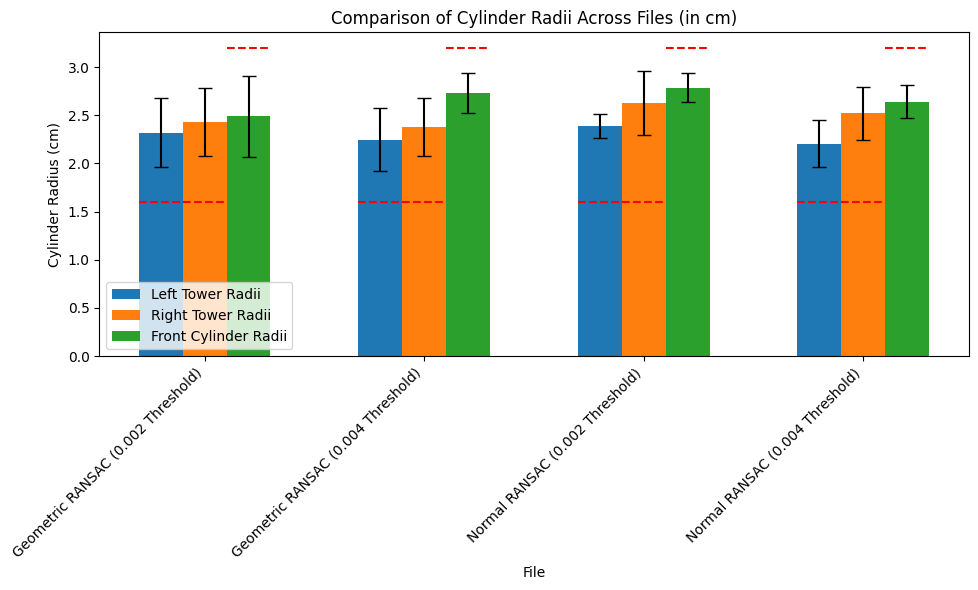

In [52]:
# Define the real radii of each cylinder in centimeters
real_radii = {
    'Left Tower': 1.6,      # replace with the actual real radius in cm
    'Right Tower': 1.6,     # replace with the actual real radius in cm
    'Front Cylinder': 3.2   # replace with the actual real radius in cm
}

# Extract cylinder radii for each cylinder type in centimeters
cylinder_radii = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}
cylinder_std_devs = {'Left Tower': [], 'Right Tower': [], 'Front Cylinder': []}

# Process each file to gather cylinder radii and calculate standard deviation
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Extract radii for each specific cylinder type, converting from meters to centimeters
    for cylinder_name in cylinder_radii.keys():
        cylinder_data = data[data['Name'] == cylinder_name]
        if not cylinder_data.empty:
            radii_cm = cylinder_data['Cylinder Radius'].dropna() * 100  # Convert from meters to cm
            cylinder_radii[cylinder_name].append(radii_cm.mean())
            cylinder_std_devs[cylinder_name].append(radii_cm.std())
        else:
            cylinder_radii[cylinder_name].append(None)  # Handle cases where data might be missing
            cylinder_std_devs[cylinder_name].append(None)

# Create a bar plot to compare the radii of each cylinder with standard deviation as error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cylinder's radii as grouped bars with error bars for standard deviation
bar_width = 0.2
x = range(len(custom_legend_names))

for i, (cylinder_name, radii) in enumerate(cylinder_radii.items()):
    std_devs = cylinder_std_devs[cylinder_name]
    bars = ax.bar([pos + i * bar_width for pos in x], radii, yerr=std_devs, capsize=5,
                  width=bar_width, label=f'{cylinder_name} Radii')
    
    # Add dashed lines for the real radius within each bar
    for bar in bars:
        ax.plot([bar.get_x(), bar.get_x() + bar.get_width()], [real_radii[cylinder_name]] * 2, 
                color='red', linestyle='--', linewidth=1.5)

# Customize plot appearance
ax.set_xlabel('File')
ax.set_ylabel('Cylinder Radius (cm)')
ax.set_title('Comparison of Cylinder Radii Across Files (in cm)')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (2,).

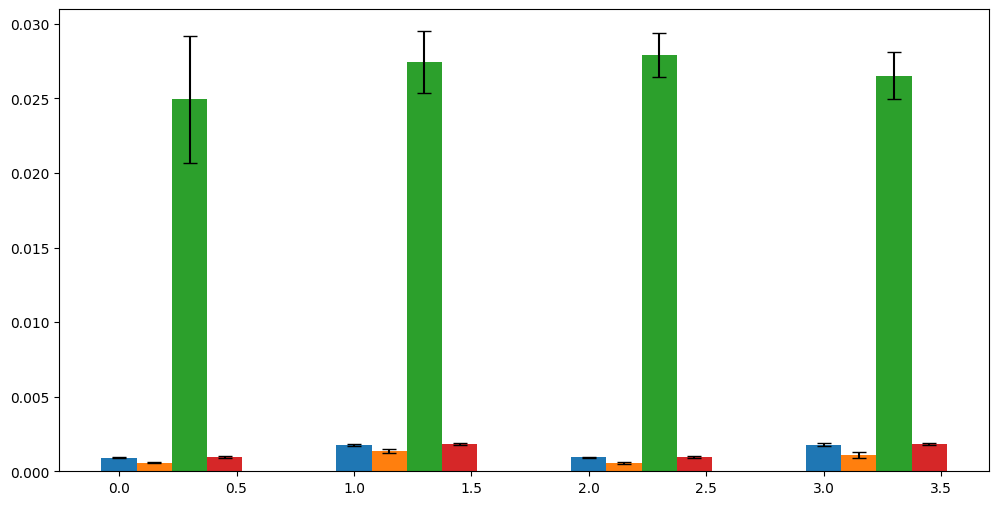

In [56]:
object_means = {}
object_stds = {}

# Process each file to calculate mean and standard deviation of "mean distance" for each object type
for file_path, legend_name in zip(file_paths, custom_legend_names):
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter out failed objects (assuming "Name" column indicates failure with "fail")
    successful_objects = data[~data['Name'].str.contains('fail', case=False, na=False)]
    
    # Group by object type (e.g., "Plane," "Cylinder") and calculate mean and std of "mean distance"
    grouped = successful_objects.groupby('Name')['Mean Distance']
    mean_distances = grouped.mean()
    std_dev_distances = grouped.std()
    
    # Store results in dictionaries
    for object_type in mean_distances.index:
        if object_type not in object_means:
            object_means[object_type] = []
            object_stds[object_type] = []
        
        object_means[object_type].append(mean_distances[object_type])
        object_stds[object_type].append(std_dev_distances[object_type])

# Plot mean distances with standard deviation error bars for each object type
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15
x = range(len(custom_legend_names))

for i, (object_type, means) in enumerate(object_means.items()):
    # Plot each object's mean distance with error bars
    std_devs = object_stds[object_type]
    ax.bar([pos + i * bar_width for pos in x], means, yerr=std_devs, capsize=5, width=bar_width, label=object_type)

# Customize plot appearance
ax.set_xlabel('File')
ax.set_ylabel('Mean Distance')
ax.set_title('Mean and Standard Deviation of Mean Distance for Each Object Type Across Files')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
plt.legend(title='Object Type')
plt.tight_layout()
plt.show()

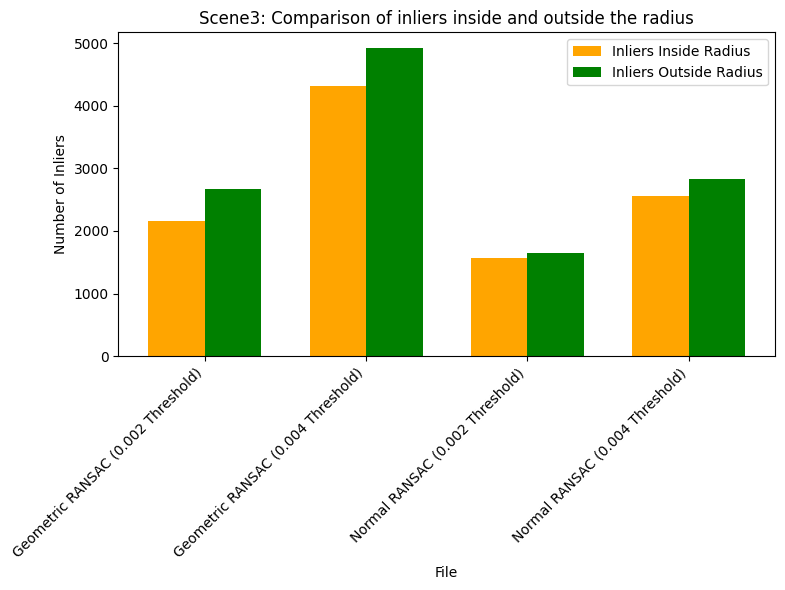

In [18]:
file_paths = [
    'Scene3BasicRansac1.xlsx',
    'Scene3BasicRansac2.xlsx',
    'Scene3NormalRansac1.xlsx',
    'Scene3NormalRansac2.xlsx'
]
custom_legend_names = [
    'Geometric RANSAC (0.002 Threshold)',
    'Geometric RANSAC (0.004 Threshold)',
    'Normal RANSAC (0.002 Threshold)',
    'Normal RANSAC (0.004 Threshold)'
]

# Lists to store inliers counts inside and outside the radius for each file
inliers_inside_radius = []
inliers_outside_radius = []

# Process each file to calculate the sum of inliers inside and outside the radius for successful cylinders
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter data where Model is "Cylinder" and Name does not contain "Fail"
    filtered_data = data[(data['Model'] == 'cylinder') & (~data['Name'].str.contains('Fail', case=False, na=False))]
    
    # Sum the inliers inside and outside the radius
    inliers_inside = filtered_data['Num Inliers within Radius'].sum()
    inliers_outside = filtered_data['Num Inliers outside Radius'].sum()
    
    inliers_inside_radius.append(inliers_inside)
    inliers_outside_radius.append(inliers_outside)

# Create a bar plot to compare inliers inside and outside the radius for each file
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = range(len(custom_legend_names))

# Plot inliers inside the radius
ax.bar(x, inliers_inside_radius, width=bar_width, label='Inliers Inside Radius', color='orange')

# Plot inliers outside the radius, with bars shifted to the right
ax.bar([pos + bar_width for pos in x], inliers_outside_radius, width=bar_width, label='Inliers Outside Radius', color='green')

# Customize plot appearance
ax.set_xlabel('File')
ax.set_ylabel('Number of Inliers')
ax.set_title('Scene3: Comparison of inliers inside and outside the radius')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

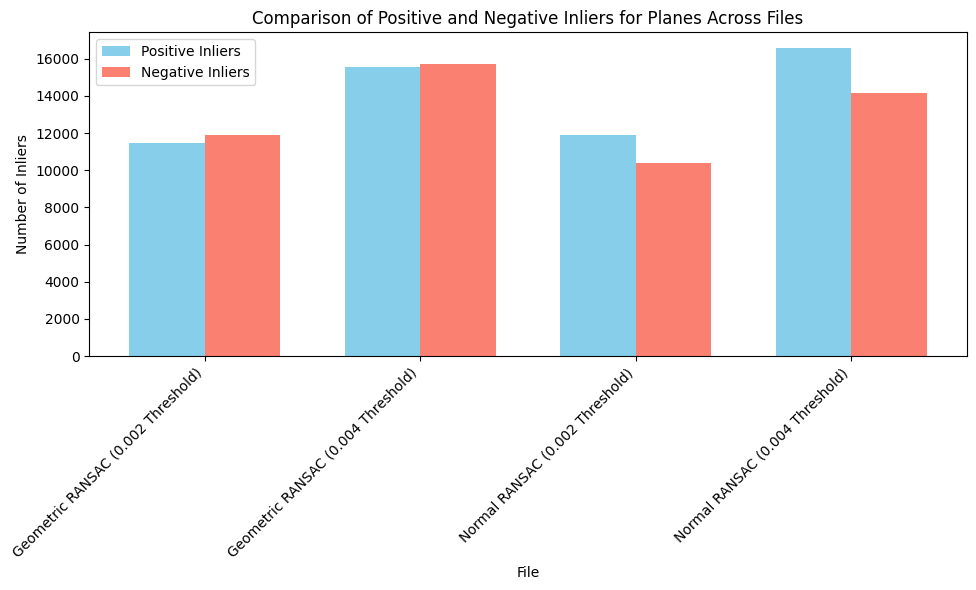

In [20]:
# Lists to store inliers counts for positive and negative inliers for each file
inliers_positive = []
inliers_negative = []


# Process each file to calculate the sum of positive and negative inliers for successful planes
for file_path in file_paths:
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Filter data where Model is "Plane" and Name does not contain "Fail"
    filtered_data = data[(data['Model'] == 'plane') & (~data['Name'].str.contains('fail', case=False, na=False))]
    
    # Sum the positive and negative inliers
    positive_inliers = filtered_data['Num Inliers Positive'].sum()
    negative_inliers = filtered_data['Num Inliers Negative'].sum()
    
    inliers_positive.append(positive_inliers)
    inliers_negative.append(negative_inliers)

# Create a bar plot to compare positive and negative inliers for each file
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(custom_legend_names))

# Plot positive inliers
ax.bar(x, inliers_positive, width=bar_width, label='Positive Inliers', color='skyblue')

# Plot negative inliers, with bars shifted to the right
ax.bar([pos + bar_width for pos in x], inliers_negative, width=bar_width, label='Negative Inliers', color='salmon')

# Customize plot appearance
ax.set_xlabel('File')
ax.set_ylabel('Number of Inliers')
ax.set_title('Comparison of Positive and Negative Inliers for Planes Across Files')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(custom_legend_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()